First 5 rows of dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  

Dataset shape: (150, 6)

Class distribution:
target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


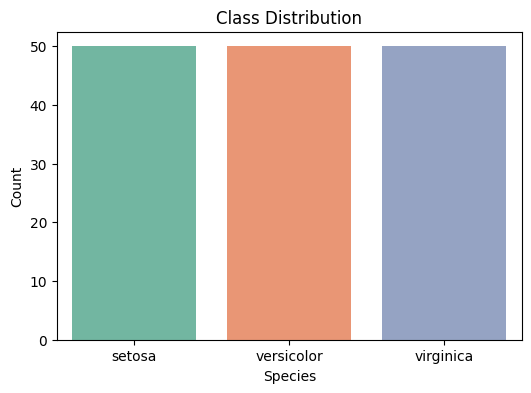

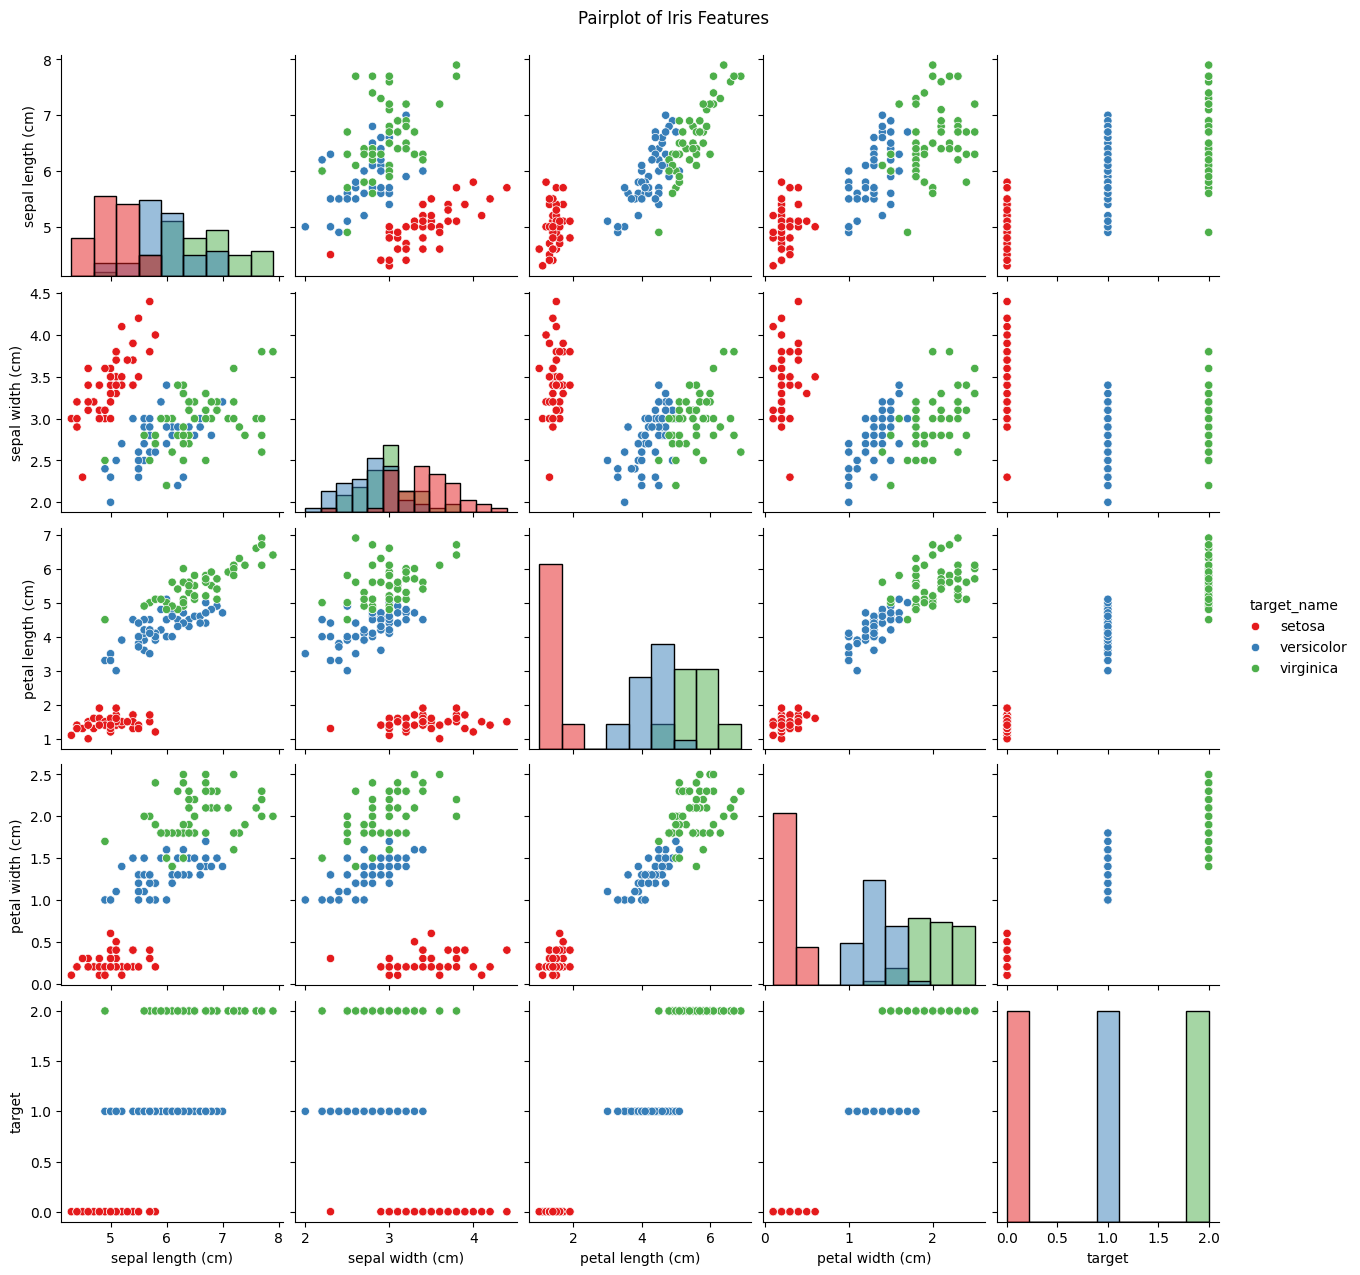

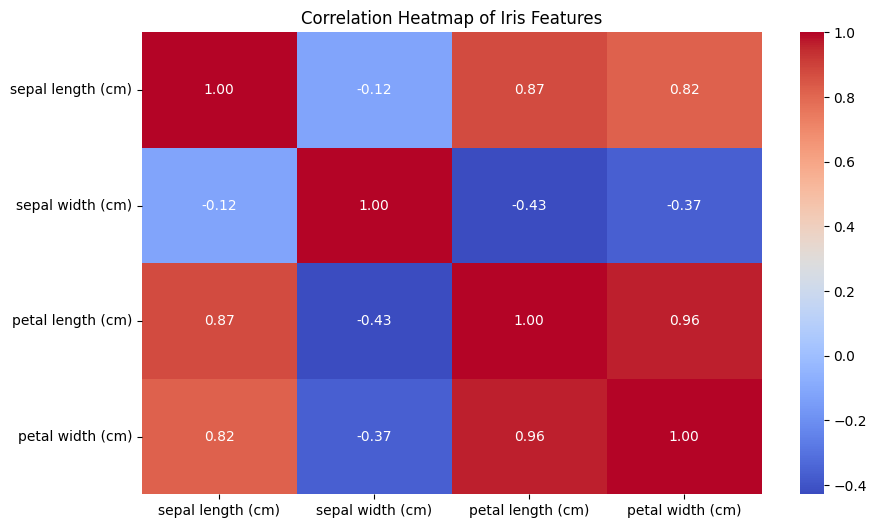


K = 1
Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


K = 3
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


K = 5
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00

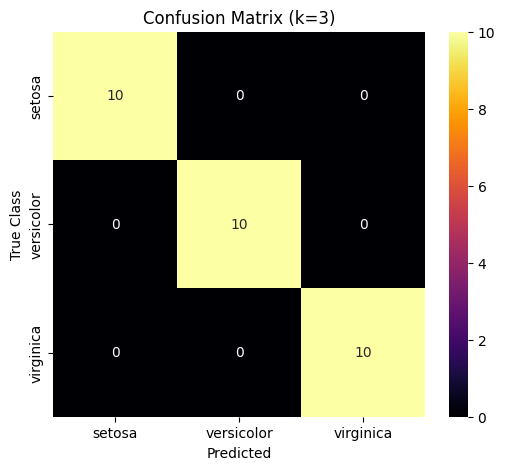

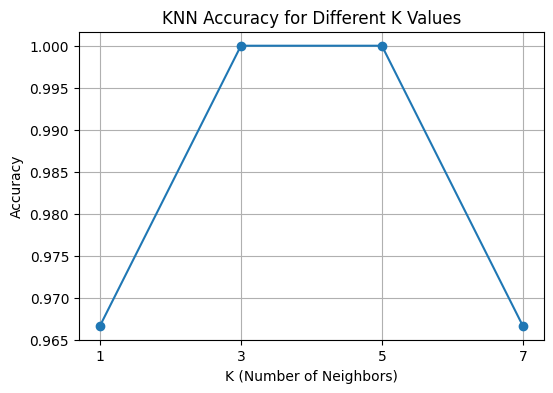

📊 Model Results Summary

Dataset: Iris Dataset
Samples: 150  Features: 4  Classes: Setosa, Versicolor, Virginica

Best k: 3  Accuracy: 1.0

Accuracy Table:
  k=1 -> Accuracy: 0.97
  k=3 -> Accuracy: 1.00
  k=5 -> Accuracy: 1.00
  k=7 -> Accuracy: 0.97

Insights:
- Lower k values (1, 3, 5) perform perfectly due to distinct class boundaries in the Iris dataset.
- Distance-based learning works well with vector space representation of features.


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].map({i: name for i, name in enumerate(iris.target_names)})

print("First 5 rows of dataset:")
print(df.head())

print("\nDataset shape:", df.shape)

print("\nClass distribution:")
print(df['target_name'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='target_name', data=df, hue='target_name', palette='Set2', legend=False)
plt.title("Class Distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

sns.pairplot(df, hue='target_name', diag_kind='hist', palette='Set1')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


from sklearn.datasets import load_iris
iris = load_iris()

# Create DataFrame with numeric target
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Features and target
X = df[iris.feature_names]
y = df['target']

# --- Correlation Heatmap ---
plt.figure(figsize=(10, 6))
corr_matrix = df[iris.feature_names].corr()  # only numeric features
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Iris Features")
plt.show()

# Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Test different k values
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

k_values = [1, 3, 5, 7]
accuracy_results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracy_results[k] = acc

    print(f"\nK = {k}")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# --- Confusion Matrix for Best k ---
best_k = max(accuracy_results, key=accuracy_results.get)
print(f"\nBest k based on accuracy: {best_k}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix,
            annot=True, fmt='d', cmap='inferno',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True Class")
plt.title(f"Confusion Matrix (k={best_k})")
plt.show()

# Show accuracy for all k values
plt.figure(figsize=(6,4))
plt.plot(list(accuracy_results.keys()), list(accuracy_results.values()), marker='o')
plt.title("KNN Accuracy for Different K Values")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()


# Automatically print model summary
print("📊 Model Results Summary\n")
print("Dataset: Iris Dataset")
print("Samples:", df.shape[0], " Features:", df.shape[1]-1, " Classes: Setosa, Versicolor, Virginica\n")

print("Best k:", best_k, " Accuracy:", round(accuracy_results[best_k], 2))
print("\nAccuracy Table:")
for k, acc in accuracy_results.items():
    print(f"  k={k} -> Accuracy: {acc:.2f}")

print("\nInsights:")
print("- Lower k values (1, 3, 5) perform perfectly due to distinct class boundaries in the Iris dataset.")
print("- Distance-based learning works well with vector space representation of features.")





